# Practica 1. Pareja 02: Daniel Mateo y Laura Sánchez.

In [1]:
# Cargamos todas las librerias necesarias para este Notebook.
from scipy.stats import norm
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import *
from sklearn.preprocessing import OneHotEncoder
from Datos import Datos
from EstrategiaParticionado import *
from Clasificador import *
from ClasificadorNB import *
import math
from pylab import *
import matplotlib.pyplot as plt

## APARTADO 1
En este primer apartado se generaron las estrategias de particionado de Validación Simple, que divide los datos según una proporción de Test; y Validación Cruzada, que los divide en K-1 folds para Train y el restante para Test.

- Pero antes, hay que leer ambos ficheros (tic-tac-toe.data y german.data) para generar sus correspondientes clases de Datos, y así poder realizar estas particiones sobre sus datos:

In [2]:
# Dataset de Tic-tac-toe.data.
datasettictac = Datos("./tic-tac-toe.data")
'''print(datasettictac.nominalAtributos)
print(datasettictac.diccionario)'''
print(datasettictac.datos)

# Dataset de German.data.
datasetgerman = Datos("./german.data")
'''print(datasetgerman.nominalAtributos)
print(datasetgerman.diccionario)'''
print(datasetgerman.datos)

[[2 2 2 ... 1 1 1]
 [2 2 2 ... 2 1 1]
 [2 2 2 ... 1 2 1]
 ...
 [1 2 1 ... 1 2 0]
 [1 2 1 ... 1 2 0]
 [1 1 2 ... 2 2 0]]
[[ 0  6  4 ...  1  0  1]
 [ 1 48  2 ...  0  0  2]
 [ 3 12  4 ...  0  0  1]
 ...
 [ 3 12  2 ...  0  0  1]
 [ 0 45  2 ...  1  0  2]
 [ 1 45  4 ...  0  0  1]]


- Con los ficheros leídos se procede a generar los objetos de las dos validaciones para cada dataset con unos atributos elegidos al azar:

In [3]:
# Validación Simple con una proporción del 50% y 2 particiones.
vs = ValidacionSimple(0.5, 2)
# Validación Cruzada con K=3 particiones totales.
vc = ValidacionCruzada(3) 

- Como más adelante se harán las particiones dentro del clasificador al validar, hemos aplicado el creaPaticiones() para que se pueda observar el correcto funcionamiento de estas estrategias de particionado en este apartado:

In [4]:
# Se imprime un bucle para que se vean las particiones con sus correspondientes indices de Train y Test, además del número 
# de indices para que se demuestre la proporción correcta indicada antes.
# (Si se quiere reducir la cantidad de texto por pantalla para despues, comente los fors enteros.)
# Validacion Simple para dataset de Tic-Tac-Toe.
print("> Validacion Simple Tic-Tac-Toe")
array_particiones = vs.creaParticiones(datasettictac.datos, None)
for particion in array_particiones:
    print("Hay " + str(len(particion.indicesTrain)) + " indices de Train:")
    print(particion.indicesTrain)
    print("\nHay " + str(len(particion.indicesTest)) + " Indices de Test:")
    print(particion.indicesTest)
    print("##################################")

# Validacion Simple para dataset de German.
print("\n> Validacion Simple German")
array_particiones = vs.creaParticiones(datasetgerman.datos, None)
for particion in array_particiones:
    print("Hay " + str(len(particion.indicesTrain)) + " indices de Train:")
    print(particion.indicesTrain)
    print("\nHay " + str(len(particion.indicesTest)) + " Indices de Test:")
    print(particion.indicesTest)
    print("##################################")

# Se imprime un bucle para que se vean las K particiones con sus correspondientes indices de Train y Test, además del número 
# de indices para que se observe el correcto particionado de los datos dentro de las particiones (K-1 folds para Train y 1 
# para Test).
# Validacion Cruzada para dataset de Tic-Tac-Toe. 
print("\n> Validacion Cruzada Tic-Tac-Toe")
array_particiones = vc.creaParticiones(datasettictac.datos, None)
for particion in array_particiones:
    print("Hay " + str(len(particion.indicesTrain)) + " indices de Train:")
    print(particion.indicesTrain)
    print("\nHay " + str(len(particion.indicesTest)) + " Indices de Test:")
    print(particion.indicesTest)
    print("##################################")

# Validacion Cruzada para dataset de German.
print("\n> Validacion Cruzada German")
array_particiones = vc.creaParticiones(datasetgerman.datos, None)
for particion in array_particiones:
    print("Hay " + str(len(particion.indicesTrain)) + " indices de Train:")
    print(particion.indicesTrain)
    print("\nHay " + str(len(particion.indicesTest)) + " Indices de Test:")
    print(particion.indicesTest)
    print("##################################")


> Validacion Simple Tic-Tac-Toe
Hay 479 indices de Train:
[377, 18, 901, 205, 46, 138, 320, 228, 133, 196, 38, 845, 154, 231, 114, 607, 443, 775, 317, 545, 465, 175, 819, 313, 366, 725, 95, 710, 565, 294, 266, 598, 531, 158, 218, 682, 461, 161, 483, 209, 79, 63, 615, 434, 612, 832, 690, 622, 312, 170, 792, 142, 378, 30, 556, 28, 345, 767, 858, 500, 546, 124, 176, 343, 297, 686, 708, 81, 864, 285, 558, 103, 213, 37, 647, 250, 680, 727, 887, 234, 31, 925, 915, 817, 370, 359, 230, 758, 504, 417, 255, 36, 592, 314, 129, 621, 860, 905, 92, 477, 908, 307, 375, 551, 917, 935, 326, 10, 664, 729, 761, 712, 334, 300, 403, 741, 583, 911, 82, 408, 6, 831, 865, 219, 780, 872, 850, 474, 449, 401, 484, 848, 718, 857, 405, 728, 873, 39, 373, 719, 603, 928, 550, 505, 587, 264, 248, 514, 371, 906, 796, 282, 924, 190, 577, 730, 55, 466, 617, 352, 822, 112, 804, 513, 238, 90, 520, 759, 706, 751, 836, 360, 912, 569, 926, 648, 800, 199, 447, 837, 503, 445, 921, 631, 625, 588, 862, 689, 753, 650, 843, 64, 10

Hay 666 indices de Train:
[543, 975, 411, 845, 9, 744, 19, 768, 977, 628, 489, 684, 268, 698, 15, 759, 110, 795, 707, 855, 840, 107, 264, 889, 892, 580, 709, 681, 315, 185, 106, 651, 597, 227, 544, 710, 982, 1, 680, 482, 878, 775, 496, 546, 660, 662, 78, 221, 925, 675, 514, 655, 265, 996, 278, 485, 200, 833, 182, 593, 600, 339, 266, 449, 366, 603, 963, 545, 406, 789, 969, 450, 812, 388, 369, 257, 226, 115, 83, 95, 967, 819, 287, 552, 363, 235, 426, 147, 571, 33, 633, 602, 91, 735, 466, 497, 741, 618, 866, 275, 837, 624, 890, 585, 835, 104, 51, 865, 617, 492, 72, 541, 276, 639, 973, 808, 605, 386, 737, 342, 738, 673, 567, 422, 401, 30, 961, 443, 503, 14, 742, 320, 112, 765, 942, 130, 701, 414, 469, 407, 909, 210, 122, 81, 526, 402, 887, 873, 938, 472, 706, 674, 619, 745, 35, 688, 501, 590, 831, 936, 261, 217, 429, 670, 346, 607, 378, 376, 209, 156, 551, 199, 728, 827, 180, 964, 565, 263, 685, 682, 648, 898, 253, 729, 384, 805, 417, 303, 415, 601, 325, 858, 870, 566, 243, 629, 479, 478, 

[247, 428, 148, 487, 876, 103, 740, 767, 116, 715, 277, 120, 241, 327, 877, 635, 989, 486, 355, 57, 811, 672, 344, 825, 290, 714, 136, 521, 392, 751, 175, 451, 548, 119, 188, 784, 172, 902, 177, 13, 504, 324, 678, 697, 262, 679, 304, 250, 646, 311, 74, 207, 132, 807, 931, 733, 317, 438, 924, 895, 842, 687, 766, 694, 224, 879, 181, 161, 310, 393, 642, 955, 484, 170, 933, 993, 588, 220, 397, 959, 724, 370, 205, 7, 29, 361, 228, 16, 239, 436, 425, 300, 251, 159, 212, 676, 309, 48, 47, 138, 462, 911, 549, 114, 554, 60, 64, 928, 133, 794, 400, 763, 722, 981, 145, 582, 867, 340, 93, 623, 900, 529, 630, 950, 448, 506, 923, 409, 160, 463, 430, 519, 637, 63, 606, 695, 622, 834, 294, 921, 4, 556, 953, 575, 21, 748, 123, 926, 944, 5, 464, 760, 184, 273, 756, 495, 445, 778, 218, 336, 500, 213, 780, 669, 316, 59, 399, 843, 68, 641, 187, 654, 561, 245, 434, 986, 757, 970, 231, 919, 828, 945, 587, 328, 954, 859, 998, 801, 169, 712, 591, 584, 896, 572, 764, 773, 547, 517, 976, 62, 677, 848, 0, 540, 34

- Se puede ver cómo las particiones se generan correctamente, respetando el número que se le ha indicado y que la proporción de cada partición es la esperada. En el caso de Validación Simple, es la introducida al crear la estrategia que sería un 50% de los datos para entrenamiento y el otro 50% para validación; y en el caso de Validación Cruzada se cumple K-1 folds, es decir, 2 folds con un 66% total de los datos entre ambos para el entrenamiento, y el fold restante, 1 con un 33%, para validación.  


- Además, la generación de los índices es sin sesgo, de manera que todos los datos pertenecientes a un particionado se han generado de manera aleatoria (en este caso sin una semilla, pero se podría haber usado al llamar a creaParticiones()).  


- La principal ventaja de Validación Cruzada frente a la Simple es que proporciona un entrenamiento con menor sesgo ya que las particiones acaban teniendo en cuenta todos los datos en Train al ir alternando de fold Test entre los que se ha hecho la división del dataset completo. Sin embargo, una desventaja es esto mismo, ya que puede llevar a un sobreajuste al modelo que se entrene con Validación Cruzada porque tiene en cuenta al final todos los datos en el entrenamiento.  


- Por el contrario, la Validación Simple puede proporcionar un sesgo mayor al no tener en cuenta todos los datos en el momento del entrenamiento. Otra desventaja es que esta suele llevar a un porcentaje de error más variable, ya que los datos de Train y Test están aleatoriamente distribuidos en la partición, por lo que las distintas particiones tendrán Tests con más o menos datos ya utilizados en los Tests de otras particiones, no como en Validación Cruzada que en cada partición el fold Test cambia completamente. Una ventaja frente a Validación Cruzada es que es menos costosa computacionalmente, al no tener que hacer las múltiples divisiones y asignaciones de los folds en cada partición.  

## APARTADO 2
En este apartado se realizó el clasificador de Naive Bayes, que supone independientes todos los atributos dada la clase y la clasificación la realiza en función de las probabilidades a posteriori de las clases.

- Se van a aprovechar los datasets del apartado anterior para la demostración de este. Vamos a utilizar unas estrategias de particionado nuevas para este apartado.

- Lo primero, creamos un clasificador de NB con la variable de Laplace a True y otro con Laplace a False. Esta variable indica si se aplica Laplace a las tablas de atributos en el caso de que exista algún 0 dentro, para evitar probabilidades nulas en los cálculos. Por lo tanto:

In [5]:
# Validación Simple con una proporción del 25% para Test y 4 particiones.
vs = ValidacionSimple(0.25, 4)
# Validación Cruzada con K=4 particiones totales.
vc = ValidacionCruzada(4) 

# Clasificador de NB con Laplace
nb_laplace = ClasificadorNaiveBayes(True)
# Clasificador de NB sin Laplace
nb_nolaplace = ClasificadorNaiveBayes(False)

- Una vez tenemos los clasificadores, hay que llamar a la función validacion() de estos. Esta función realiza todo el proceso de entrenamiento y de validación de los resultados obtenidos de las predicciones. En el entrenamiento, se crean las tablas de atributos para las verosimilitudes y una tabla con las prioris de las clases, calculándolas recorriendo los datos correspondientes a los índices de Train de la partición actual. Y, con estos valores obtenidos (lo que es igual a tener el modelo entrenado), se procede a realizar el cálculo de las probabilidades a posteriori de las clases, en función de sus verosimilitudes y sus prioris. Con estas posterioris calculadas, se aplica la decisión MAP (mayor probabilidad a posteriori) de las posterioris de una clase para la clasificación de los datos de Test, obteniendo las predicciones finales del clasificador NB. 


- Después de esto, se procede a calcular la tasa de error del clasificador con su función error(). Esta devuelve el número de clasificaciones incorrectas de las predicciones de NB sobre los datos de Test, comparándolas con los valores reales de sus clases. Por lo tanto, se devuelve al final un array con las tasas de error correspondientes a cada una de las particiones.


- Se ha realizado todo esto por cada uno de los datasets, utilizando cada uno de los clasificadores y cada una de las estrategias de particionado. Y se ha calculado la media y la desviación típica de las tasas de errores de cada caso, para hacer una tabla después. Además, se guardarán las matrices de confusión y las tasas de confusión de cada uno de los clasificadores para cada uno de los casos. Entonces:

In [6]:
# Diccionario con las medias y desviaciones para la posterior tabla.
dicc_med_desv = {}
dicc_med_desv['Laplace'] = {}
dicc_med_desv['NoLaplace'] = {}
dicc_med_desv['Laplace']['VS'] = {}
dicc_med_desv['NoLaplace']['VS'] = {}
dicc_med_desv['Laplace']['VC'] = {}
dicc_med_desv['NoLaplace']['VC'] = {}

# Diccionario con las matrices de confusión
dicc_matrices = {}
dicc_matrices['Laplace'] = {}
dicc_matrices['NoLaplace'] = {}
dicc_matrices['Laplace']['VS'] = {}
dicc_matrices['NoLaplace']['VS'] = {}
dicc_matrices['Laplace']['VC'] = {}
dicc_matrices['NoLaplace']['VC'] = {}

# Diccionario con las tasas de confusión
dicc_tasas = {}
dicc_tasas['Laplace'] = {}
dicc_tasas['NoLaplace'] = {}
dicc_tasas['Laplace']['VS'] = {}
dicc_tasas['NoLaplace']['VS'] = {}
dicc_tasas['Laplace']['VC'] = {}
dicc_tasas['NoLaplace']['VC'] = {}

# Función auxiliar para los cálculos de la tabla.
def calcula_med_desv(tasas_error, rev):
    n = len(tasas_error)
    media = 0
    desviacion = 0
    for error in tasas_error:
        if rev:
            error = 1 - error
        media += error
    media /= n
    
    for error in tasas_error:
        if rev:
            error = 1 - error
        desviacion += (error - media)**2
    desviacion = math.sqrt(desviacion/n)
    
    return media, desviacion;


# NB con Laplace y Validación Simple sobre Tic-Tac-Toe.
tasas_error = nb_laplace.validacion(vs, datasettictac, nb_laplace, None)
media,desviacion = calcula_med_desv(tasas_error, False)
dicc_med_desv['Laplace']['VS']['TTT_MED'] = media
dicc_med_desv['Laplace']['VS']['TTT_DESV'] = desviacion
dicc_matrices['Laplace']['VS']['TTT'] = nb_laplace.matriz_confusion
dicc_tasas['Laplace']['VS']['TTT'] = nb_laplace.tasas_confusion

# NB con Laplace y Validación Simple sobre German.
tasas_error = nb_laplace.validacion(vs, datasetgerman, nb_laplace, None)
media,desviacion = calcula_med_desv(tasas_error, False)
dicc_med_desv['Laplace']['VS']['GER_MED'] = media
dicc_med_desv['Laplace']['VS']['GER_DESV'] = desviacion
dicc_matrices['Laplace']['VS']['GER'] = nb_laplace.matriz_confusion
dicc_tasas['Laplace']['VS']['GER'] = nb_laplace.tasas_confusion

# NB con Laplace y Validación Cruzada sobre Tic-Tac-Toe.
tasas_error = nb_laplace.validacion(vc, datasettictac, nb_laplace, None)
media,desviacion = calcula_med_desv(tasas_error, False)
dicc_med_desv['Laplace']['VC']['TTT_MED'] = media
dicc_med_desv['Laplace']['VC']['TTT_DESV'] = desviacion
dicc_matrices['Laplace']['VC']['TTT'] = nb_laplace.matriz_confusion
dicc_tasas['Laplace']['VC']['TTT'] = nb_laplace.tasas_confusion

# NB con Laplace y Validación Cruzada sobre German.
tasas_error = nb_laplace.validacion(vc, datasetgerman, nb_laplace, None)
media,desviacion = calcula_med_desv(tasas_error, False)
dicc_med_desv['Laplace']['VC']['GER_MED'] = media
dicc_med_desv['Laplace']['VC']['GER_DESV'] = desviacion
dicc_matrices['Laplace']['VC']['GER'] = nb_laplace.matriz_confusion
dicc_tasas['Laplace']['VC']['GER'] = nb_laplace.tasas_confusion

# NB sin Laplace y Validación Simple sobre Tic-Tac-Toe.
tasas_error = nb_nolaplace.validacion(vs, datasettictac, nb_nolaplace, None)
media,desviacion = calcula_med_desv(tasas_error, False)
dicc_med_desv['NoLaplace']['VS']['TTT_MED'] = media
dicc_med_desv['NoLaplace']['VS']['TTT_DESV'] = desviacion
dicc_matrices['NoLaplace']['VS']['TTT'] = nb_nolaplace.matriz_confusion
dicc_tasas['NoLaplace']['VS']['TTT'] = nb_nolaplace.tasas_confusion

# NB sin Laplace y Validación Simple sobre German.
tasas_error = nb_nolaplace.validacion(vs, datasetgerman, nb_nolaplace, None)
media,desviacion = calcula_med_desv(tasas_error, False)
dicc_med_desv['NoLaplace']['VS']['GER_MED'] = media
dicc_med_desv['NoLaplace']['VS']['GER_DESV'] = desviacion
dicc_matrices['NoLaplace']['VS']['GER'] = nb_nolaplace.matriz_confusion
dicc_tasas['NoLaplace']['VS']['GER'] = nb_nolaplace.tasas_confusion

# NB sin Laplace y Validación Cruzada sobre Tic-Tac-Toe.
tasas_error = nb_nolaplace.validacion(vc, datasettictac, nb_nolaplace, None)
media,desviacion = calcula_med_desv(tasas_error, False)
dicc_med_desv['NoLaplace']['VC']['TTT_MED'] = media
dicc_med_desv['NoLaplace']['VC']['TTT_DESV'] = desviacion
dicc_matrices['NoLaplace']['VC']['TTT'] = nb_nolaplace.matriz_confusion
dicc_tasas['NoLaplace']['VC']['TTT'] = nb_nolaplace.tasas_confusion

# NB sin Laplace y Validación Cruzada sobre German.
tasas_error = nb_nolaplace.validacion(vc, datasetgerman, nb_nolaplace, None)
media,desviacion = calcula_med_desv(tasas_error, False)
dicc_med_desv['NoLaplace']['VC']['GER_MED'] = media
dicc_med_desv['NoLaplace']['VC']['GER_DESV'] = desviacion
dicc_matrices['NoLaplace']['VC']['GER'] = nb_nolaplace.matriz_confusion
dicc_tasas['NoLaplace']['VC']['GER'] = nb_nolaplace.tasas_confusion

- A continuación, la tabla con las medias y desviaciones:

In [7]:
#print(dicc_med_desv)
# *Forma tabla*
# Usando Laplace:   | TTT_μ | TTT_σ | GER_μ | GER_σ |
#                 VS|       |       |       |       |
#                 VC|       |       |       |       |
# VS == Se usa estrategia Validación Simple
# VC == Se usa estrategia Validación Cruzada
# TXT_μ == Media μ de las tasas de error sobre el texto TXT
# TXT_σ == Desviación típica σ de las tasas de error sobre el texto TXT
# TTT == TXT de Tic-Tac-Toe.data
# GER == TXT de German.data

print("> Tabla con medias y desviaciones del clasificador NB con Laplace:\n")
print('    {4}  {0:2}   {4}   {1:3}  {4}   {2:4}   {4}   {3:5}  {4}'.format("TTT_μ", "TTT_σ", "GER_μ", "GER_σ",'|'))
print(' VS {4} {0:2f} {4} {1:3f} {4} {2:4f}  {4} {3:5f} {4}'.format(dicc_med_desv['Laplace']['VS']['TTT_MED'] , dicc_med_desv['Laplace']['VS']['TTT_DESV'], dicc_med_desv['Laplace']['VS']['GER_MED'], dicc_med_desv['Laplace']['VS']['GER_DESV'],'|'))
print(' VC {4} {0:2f} {4} {1:3f} {4} {2:4f}  {4} {3:5f} {4}'.format(dicc_med_desv['Laplace']['VC']['TTT_MED'] , dicc_med_desv['Laplace']['VC']['TTT_DESV'], dicc_med_desv['Laplace']['VC']['GER_MED'], dicc_med_desv['Laplace']['VC']['GER_DESV'],'|'))

print("\n")

print("> Tabla con medias y desviaciones del clasificador NB sin Laplace:\n")
print('    {4}  {0:2}   {4}   {1:3}  {4}   {2:4}   {4}   {3:5}  {4}'.format("TTT_μ", "TTT_σ", "GER_μ", "GER_σ",'|'))
print(' VS {4} {0:2f} {4} {1:3f} {4} {2:4f}  {4} {3:5f} {4}'.format(dicc_med_desv['NoLaplace']['VS']['TTT_MED'] , dicc_med_desv['NoLaplace']['VS']['TTT_DESV'], dicc_med_desv['NoLaplace']['VS']['GER_MED'], dicc_med_desv['NoLaplace']['VS']['GER_DESV'],'|'))
print(' VC {4} {0:2f} {4} {1:3f} {4} {2:4f}  {4} {3:5f} {4}'.format(dicc_med_desv['NoLaplace']['VC']['TTT_MED'] , dicc_med_desv['NoLaplace']['VC']['TTT_DESV'], dicc_med_desv['NoLaplace']['VC']['GER_MED'], dicc_med_desv['NoLaplace']['VC']['GER_DESV'],'|'))

> Tabla con medias y desviaciones del clasificador NB con Laplace:

    |  TTT_μ   |   TTT_σ  |   GER_μ   |   GER_σ  |
 VS | 0.301255 | 0.031311 | 0.251000  | 0.017748 |
 VC | 0.294979 | 0.028761 | 0.268000  | 0.021541 |


> Tabla con medias y desviaciones del clasificador NB sin Laplace:

    |  TTT_μ   |   TTT_σ  |   GER_μ   |   GER_σ  |
 VS | 0.300209 | 0.030658 | 0.241000  | 0.009110 |
 VC | 0.299163 | 0.043129 | 0.254000  | 0.015362 |


- Se puede observar cómo la media μ de las tasas de errores del clasificador con Laplace vale alrededor del 27% y la media del clasificador sin Laplace vale alrededor del 28% también. Además, la desviación típica σ de las tasas de errores respecto a sus medias μ no es nada grande, tan solo de un 2% aprox. en NB con Laplace y sin Laplace.


- Con los atributos elegidos para que las proporciones fueran más o menos iguales para Validación Cruzada y Validación Simple (1/4 de proporción para el Test) se puede ver que las medias de las tasas de errores usando ambas estrategias es muy parecida. Sin embargo, se puede notar, no por mucho, que la Validación Cruzada parece haber tenido mejores resultados en este apartado que la Validación Simple. 


- En cuanto a las ventajas/desventajas de VS y VC dichas en el anterior apartado, nos hemos dado cuenta de que las medias de las tasas de error de Validación Simple son, efectivamente, más variables que las de Validación Cruzada. Esto se puede ver reflejado en la desviación porque es un poco mayor cuando se usa Validación Simple. Y, en cuanto a las medias, Validación Cruzada es en la teoría la que menor tasa de error general debería producir y se puede confirmar con las múltiples pruebas que hemos hecho sobre estos datasets, donde ha tenido menores medias que la Validación Simple.


- En cuanto a la corrección de Laplace, esta se ha visto, por lo dicho en el primer párrafo, que es un poco menor la media del error cuando se aplica en el clasificador de NB. Esto puede ser debido a que las probabilidades nulas sí tienen una representación importante al corregirse y no valer 0, lo que acaba mejorando la probabilidad a posteriori.


- Esto quiere decir que las clasificaciones de nuestro modelo de Naive Bayes poseen un acierto del 70-75% y un error del 25-30% de manera general. Es un buen porcentaje de error pero que se podría mejorar con otro modelo seguramente.

## APARTADO 3
En este apartado se ha vuelto a realizar lo mismo que en el apartado anterior pero se han utilizado las funciones pertenecientes al paquete de scikit-learn.

- Primero leemos los datos de Tic-Tac-Toe.data de nuevo y reutilizamos el dataset de German.data de los apartados anteriores:

In [8]:
data_ttt_scikit = pd.read_csv("./tic-tac-toe.data")
'''P*
#Caso probado para dataset nuestro de Tic-Tac-Toe.
data_ttt_scikit = datasettictac.datos'''
data_ger_scikit = datasetgerman.datos

- Dividimos los datasets en dos conjuntos: X, que posee las columnas de los atributos que no son la clase; y, que posee la columna de la clase. Hacemos esto porque es necesario para luego aplicar los métodos de scikit-learn. Por lo tanto, hacemos:

In [9]:
# X e y del dataset de Tic-Tac-Toe
nombres_atrs = list(data_ttt_scikit.columns)
nombres_atrs.remove('Class')
X_train_ttt = data_ttt_scikit[nombres_atrs].values
y_train_ttt = data_ttt_scikit['Class'].values
'''P* 
#Caso probado para dataset nuestro de Tic-Tac-Toe.
X_train_ttt = []
y_train_ttt = []
for dato in data_ttt_scikit:
    y_train_ttt.append(dato[-1])
    X_train_ttt.append(dato[0:len(dato)-1])'''

# X e y del dataset de German
X_train_ger = []
y_train_ger = []
for dato in data_ger_scikit:
    y_train_ger.append(dato[-1])
    X_train_ger.append(dato[0:len(dato)-1])

- Ahora, procedemos a crear los clasificadores que vamos a utilizar. Estos serán los mismos que los creados en el apartado 2. Sin embargo, no podemos aplicar Laplace en el modelo GaussianNB, por lo que no haremos esta comparación entre usar Laplace o no con el dataset de German. Como utilizamos el modelo MultinomialNB para Tic-Tac-Toe, para este sí haremos la comparación al poderse realizar esta corrección. Por lo tanto, los creamos:

In [10]:
# Modelo NB con la corrección de Laplace (para Tic-Tac-Toe)
cf_multi_laplace = MultinomialNB(alpha=1)
# Modelo NB sin la corrección de Laplace (para Tic-Tac-Toe)
cf_multi_nolaplace = MultinomialNB(alpha=0.0000001)
# Modelo NB Gaussiano (para German)
cf_gaussian = GaussianNB()

- Pero antes de realizar los procesos de entrenamiento y validación de los modelos anteriores, tenemos que preprocesar los datos del conjunto X de Tic-Tac-Toe para que funcionen correctamente los métodos (ya que este conjunto posee variables con valores nominales). En el caso de German, como utilizamos el dataset ya transformado por nosotros, no hace falta aplicar este preprocesado. Entonces, sería:

In [11]:
'''P*
#Comentado lo siguiente.'''
# Generamos la clase del preprocesamiento
enc = OneHotEncoder()
# Preprocesamos el conjunto X de Tic-Tac-Toe
X_train_ttt = enc.fit_transform(X_train_ttt).toarray()

- A continuación, realizamos los entrenamientos y las validaciones de los 3 modelos anteriores con la función cross_val_score() del paquete scikit-learn. Esta función genera las particiones mediante Validación Cruzada y posteriormente realiza el proceso de entrenamiento y la validación de sus clasificaciones. Al final, devuelve un array con los "scores", que son las precisiones del modelo en cada partición (% de aciertos). Como hemos hecho en el apartado anterior, generamos 4 particiones para que la proporción de cada fold sea del 25%. 
- Además, se han calculado las medias y desviaciones típicas de cada modelo en cada caso para generar otra tabla y comparar los resultados con la del apartado 2. Por lo tanto:

In [12]:
# NB Multinomial con Laplace y Validación Cruzada sobre Tic-Tac-Toe.
scores = cross_val_score(cf_multi_laplace, X_train_ttt, y_train_ttt, cv=4)
media,desviacion = calcula_med_desv(scores, True)
dicc_med_desv['Laplace']['VC']['TTT_MED'] = media
dicc_med_desv['Laplace']['VC']['TTT_DESV'] = desviacion

# NB Multinomial sin Laplace y Validación Cruzada sobre Tic-Tac-Toe.
scores = cross_val_score(cf_multi_nolaplace, X_train_ttt, y_train_ttt, cv=4)
media,desviacion = calcula_med_desv(scores, True)
dicc_med_desv['NoLaplace']['VC']['TTT_MED'] = media
dicc_med_desv['NoLaplace']['VC']['TTT_DESV'] = desviacion

# NB Gaussiano y Validación Cruzada sobre German.
scores = cross_val_score(cf_gaussian, X_train_ger, y_train_ger, cv=4)
media,desviacion = calcula_med_desv(scores, True)
dicc_med_desv['NoLaplace']['VC']['GER_MED'] = media
dicc_med_desv['NoLaplace']['VC']['GER_DESV'] = desviacion

- Tras usar la Validación Cruzada, aplicamos la Validación Simple para generar las particiones que se usarán en el entrenamiento y la validación de los modelos anteriores. Esta estrategia de particionado se genera mediante el método train_test_split() de scikit-learn. Creamos un bucle de 4 repeticiones para obtener 4 particiones con una proporción Test del 25%. Tras obtener los nuevos conjuntos X e y correspondientes a las particiones, los utilizamos para entrenar los modelos mediante el método fit() y realizar la validación mediante el método score(). Esta última devuelve también un array de las precisiones.

In [13]:
scores1 = []
scores2 = []
scores3 = []
i = 0
while i < 4:
    X_train_tttaux, X_test_tttaux, y_train_tttaux, y_test_tttaux = train_test_split(X_train_ttt, y_train_ttt, test_size=0.25)
    X_train_geraux, X_test_geraux, y_train_geraux, y_test_geraux = train_test_split(X_train_ger, y_train_ger, test_size=0.25)
    
    #Entrenamos los modelos con los datos de entrenamiento de la particion
    cf_multi_laplace.fit(X_train_tttaux, y_train_tttaux)
    cf_multi_nolaplace.fit(X_train_tttaux, y_train_tttaux)
    cf_gaussian.fit(X_train_geraux, y_train_geraux)

    #Calculamos los scores validando con el Test de la particion
    # NB Multinomial con Laplace y Validación Simple sobre Tic-Tac-Toe.
    scores = cf_multi_laplace.score(X_test_tttaux, y_test_tttaux)
    scores1.append(scores)
    
    # NB Multinomial sin Laplace y Validación Simple sobre Tic-Tac-Toe.
    scores = cf_multi_nolaplace.score(X_test_tttaux, y_test_tttaux)
    scores2.append(scores)
    
    # NB Gaussiana y Validación Simple sobre German.
    scores = cf_gaussian.score(X_test_geraux, y_test_geraux)
    scores3.append(scores)
    
    i += 1

# Calculamos medias y desviaciones de las tasas de error
media,desviacion = calcula_med_desv(scores1, True)
dicc_med_desv['Laplace']['VS']['TTT_MED'] = media
dicc_med_desv['Laplace']['VS']['TTT_DESV'] = desviacion

media,desviacion = calcula_med_desv(scores2, True)
dicc_med_desv['NoLaplace']['VS']['TTT_MED'] = media
dicc_med_desv['NoLaplace']['VS']['TTT_DESV'] = desviacion

media,desviacion = calcula_med_desv(scores3, True)
dicc_med_desv['NoLaplace']['VS']['GER_MED'] = media
dicc_med_desv['NoLaplace']['VS']['GER_DESV'] = desviacion


- Entonces, una vez tenemos todas las medias y desviaciones, hemos creado unas tablas parecidas a las del apartado anterior para que podamos comentar y analizar los resultados obtenidos:

In [14]:
# *Forma tabla*
# MultinomialNB - TTT:    | μ_Laplace | σ_Laplace | μ_NoLaplace | σ_NoLaplace |
#                       VS|           |           |             |             |
#                       VC|           |           |             |             |
# VS == Se usa estrategia Validación Simple
# VC == Se usa estrategia Validación Cruzada
# μ_Laplace == Media μ de las tasas de error aplicando Laplace
# σ_Laplace == Desviación típica σ de las tasas de error sin aplicar Laplace

print("> Tabla con medias y desviaciones del clasificador MultinomialNB sobre Tic-Tac-Toe:\n")
print(' MultinomialNB - TTT {4}  {0:2}   {4}   {1:3}  {4}   {2:4}   {4}   {3:5}  {4}'.format("μ_Laplace", "σ_Laplace", "μ_NoLaplace", "σ_NoLaplace",'|'))
print('                 VS  {4}   {0:2f}   {4}   {1:3f}   {4}    {2:4f}     {4}    {3:5f}    {4}'.format(dicc_med_desv['Laplace']['VS']['TTT_MED'] , dicc_med_desv['Laplace']['VS']['TTT_DESV'], dicc_med_desv['NoLaplace']['VS']['TTT_MED'], dicc_med_desv['NoLaplace']['VS']['TTT_DESV'],'|'))
print('                 VC  {4}   {0:2f}   {4}   {1:3f}   {4}    {2:4f}     {4}    {3:5f}    {4}'.format(dicc_med_desv['Laplace']['VC']['TTT_MED'] , dicc_med_desv['Laplace']['VC']['TTT_DESV'], dicc_med_desv['NoLaplace']['VC']['TTT_MED'], dicc_med_desv['NoLaplace']['VC']['TTT_DESV'],'|'))

print("\n")

print("> Tabla con medias y desviaciones del clasificador GaussianNB sobre German:\n")
print(' GaussianNB - GER {2}  {0:2}   {2}   {1:3}  {2}'.format("μ_NoLaplace", "σ_NoLaplace",'|'))
print('               VS {2}    {0:2f}    {2}    {1:3f}    {2}'.format(dicc_med_desv['NoLaplace']['VS']['GER_MED'] , dicc_med_desv['NoLaplace']['VS']['GER_DESV'], '|'))
print('               VC {2}    {0:2f}    {2}    {1:3f}    {2}'.format(dicc_med_desv['NoLaplace']['VC']['GER_MED'] , dicc_med_desv['NoLaplace']['VC']['GER_DESV'], '|'))

> Tabla con medias y desviaciones del clasificador MultinomialNB sobre Tic-Tac-Toe:

 MultinomialNB - TTT |  μ_Laplace   |   σ_Laplace  |   μ_NoLaplace   |   σ_NoLaplace  |
                 VS  |   0.311458   |   0.022317   |    0.311458     |    0.022317    |
                 VC  |   0.407170   |   0.040839   |    0.407170     |    0.040839    |


> Tabla con medias y desviaciones del clasificador GaussianNB sobre German:

 GaussianNB - GER |  μ_NoLaplace   |   σ_NoLaplace  |
               VS |    0.261000    |    0.020273    |
               VC |    0.266000    |    0.024249    |


- Por lo general, se puede observar que las medias de las tasas de error y las desviaciones, de los modelos de las funciones del paquete scikit-learn, son practicamente las mismas que las obtenidas con nuestros clasificadores de Naive Bayes. Esta media vale en torno al 30% cuando se usa Validación Simple y 40% cuando se usa Validación Cruzada, por lo que nuestros clasificadores se realizaron correctamente al poseer resultados parecidos.


- En cuanto a las diferencias entre MultinomialNB y GaussianNB, hemos notado que las medias y variaciones de GaussianNB son menores que las obtenidas mediante MultinomialNB con Laplace y sin Laplace.


- Hemos observado que los métodos de este paquete generan una media de tasas de errores y una desviación típica un poco mayor que nuestros clasificadores cuando se aplica la estrategia de particionado de Validación Cruzada. Además, estos valores son también mayores que respecto a utilizar la estrategia de Validación Simple, y habíamos indicado anteriormente que lo normal es que Validación Simple suele dar mayores tasas de error debido a su variabilidad, que se reflejaba en la desviación. Hemos realizado varias pruebas y los valores parecen ser, más veces, mayores en Validación Cruzada. Puede ser una suposición, pero puede ser que el preprocesamiento del dataset de Tic-Tac-Toe esté afectando negativamente en este ejemplo en concreto.


- Esta suposición parece ser correcta, ya que hemos ejecutado los entrenamientos y las validaciones de los métodos de scikit-learn utilizando directamente nuestro propio dataset de Tic-Tac-Toe generado en el apartado 1 (como habíamos hecho con el de German) para MultinomialNB. Al obtener las tablas anteriores, pero con esta pequeña prueba puntual, hemos visto que las medias de MultinomialNB con y sin Laplace, utilizando Validación Cruzada, han bajado un 5% hasta el 35% de tasa media de error y las desviaciones han cumplido la teoría, es decir, han salido menores las desviaciones cuando se utilizaba Validación Cruzada frente a la Validación Simple. Así que, por esta prueba (repetida varias veces), creemos que el preprocesado de Tic-Tac-Toe ha empeorado un poco al modelo de MultinomialNB con Validación Cruzada. Igualmente, dejamos el preprocesado hecho, ya que es lo que se indica en el enunciado de la práctica. Hemos dejado comentado lo que habíamos cambiado para esta pequeña prueba con P*.


- GaussianNB, por el contrario, como utiliza el dataset nuestro de German tiene un rendimiento generalmente bueno y muy parecido al clasificador NB que hemos creado nosotros en el apartado 2.

## APARTADO 4
En este último apartado se nos pidió realizar un análisis ROC sobre los clasificadores empleados.

- Primero, mostramos las matrices de confusión calculadas en el apartado 2 para cada caso de los dos clasificadores de ese mismo apartado:

In [15]:
#print(dicc_matrices)

print("> Matriz de confusion para NB con Laplace y Validación Cruzada sobre Tic-Tac-Toe:\n")
print(' {4}  {0:2}   {4}  {1:2}  {4}  {2:2}  {4}  {3:2}  {4}'.format("TP", "FP", "FN", "TN",'|'))
print(' {4}  {0:2}  {4}  {1:2}  {4}  {2:2}  {4}  {3:2}  {4}'.format(dicc_matrices['Laplace']['VC']['TTT'][0], dicc_matrices['Laplace']['VC']['TTT'][1], dicc_matrices['Laplace']['VC']['TTT'][2], dicc_matrices['Laplace']['VC']['TTT'][3],'|'))
print("\n")

print("> Matriz de confusion para NB con Laplace y Validación Simple sobre Tic-Tac-Toe:\n")
print(' {4}  {0:2}   {4}  {1:2}  {4}  {2:2}  {4}  {3:2}  {4}'.format("TP", "FP", "FN", "TN",'|'))
print(' {4}  {0:2}  {4}  {1:2}  {4}  {2:2}  {4}  {3:2}  {4}'.format(dicc_matrices['Laplace']['VS']['TTT'][0], dicc_matrices['Laplace']['VS']['TTT'][1], dicc_matrices['Laplace']['VS']['TTT'][2], dicc_matrices['Laplace']['VS']['TTT'][3],'|'))
print("\n")

print("> Matriz de confusion para NB con Laplace y Validación Cruzada sobre German:\n")
print(' {4}  {0:2}   {4}  {1:2}  {4}  {2:2}  {4}  {3:2}   {4}'.format("TP", "FP", "FN", "TN",'|'))
print(' {4}  {0:2}   {4}  {1:2}  {4}  {2:2}  {4}  {3:2}  {4}'.format(dicc_matrices['Laplace']['VC']['GER'][0], dicc_matrices['Laplace']['VC']['GER'][1], dicc_matrices['Laplace']['VC']['GER'][2], dicc_matrices['Laplace']['VC']['GER'][3],'|'))
print("\n")

print("> Matriz de confusion para NB con Laplace y Validación Simple sobre German:\n")
print(' {4}  {0:2}   {4}  {1:2}  {4}  {2:2}  {4}  {3:2}   {4}'.format("TP", "FP", "FN", "TN",'|'))
print(' {4}  {0:2}   {4}  {1:2}  {4}  {2:2}  {4}  {3:2}  {4}'.format(dicc_matrices['Laplace']['VS']['GER'][0], dicc_matrices['Laplace']['VS']['GER'][1], dicc_matrices['Laplace']['VS']['GER'][2], dicc_matrices['Laplace']['VS']['GER'][3],'|'))
print("\n")


print("> Matriz de confusion para NB sin Laplace y Validación Cruzada sobre Tic-Tac-Toe:\n")
print(' {4}  {0:2}   {4}  {1:2}  {4}  {2:2}  {4}  {3:2}  {4}'.format("TP", "FP", "FN", "TN",'|'))
print(' {4}  {0:2}  {4}  {1:2}  {4}  {2:2}  {4}  {3:2}  {4}'.format(dicc_matrices['NoLaplace']['VC']['TTT'][0], dicc_matrices['NoLaplace']['VC']['TTT'][1], dicc_matrices['NoLaplace']['VC']['TTT'][2], dicc_matrices['NoLaplace']['VC']['TTT'][3],'|'))
print("\n")

print("> Matriz de confusion para NB sin Laplace y Validación Simple sobre Tic-Tac-Toe:\n")
print(' {4}  {0:2}   {4}  {1:2}  {4}  {2:2}  {4}  {3:2}  {4}'.format("TP", "FP", "FN", "TN",'|'))
print(' {4}  {0:2}  {4}  {1:2}  {4}  {2:2}  {4}  {3:2}  {4}'.format(dicc_matrices['NoLaplace']['VS']['TTT'][0], dicc_matrices['NoLaplace']['VS']['TTT'][1], dicc_matrices['NoLaplace']['VS']['TTT'][2], dicc_matrices['NoLaplace']['VS']['TTT'][3],'|'))
print("\n")

print("> Matriz de confusion para NB sin Laplace y Validación Cruzada sobre German:\n")
print(' {4}  {0:2}   {4}  {1:2}  {4}  {2:2}  {4}  {3:2}   {4}'.format("TP", "FP", "FN", "TN",'|'))
print(' {4}  {0:2}   {4}  {1:2}  {4}  {2:2}  {4}  {3:2}  {4}'.format(dicc_matrices['NoLaplace']['VC']['GER'][0], dicc_matrices['NoLaplace']['VC']['GER'][1], dicc_matrices['NoLaplace']['VC']['GER'][2], dicc_matrices['NoLaplace']['VC']['GER'][3],'|'))
print("\n")

print("> Matriz de confusion para NB sin Laplace y Validación Simple sobre German:\n")
print(' {4}  {0:2}   {4}  {1:2}  {4}  {2:2}  {4}  {3:2}   {4}'.format("TP", "FP", "FN", "TN",'|'))
print(' {4}  {0:2}   {4}  {1:2}  {4}  {2:2}  {4}  {3:2}  {4}'.format(dicc_matrices['NoLaplace']['VS']['GER'][0], dicc_matrices['NoLaplace']['VS']['GER'][1], dicc_matrices['NoLaplace']['VS']['GER'][2], dicc_matrices['NoLaplace']['VS']['GER'][3],'|'))

> Matriz de confusion para NB con Laplace y Validación Cruzada sobre Tic-Tac-Toe:

 |  TP   |  FP  |  FN  |  TN  |
 |  124  |  51  |  29  |  35  |


> Matriz de confusion para NB con Laplace y Validación Simple sobre Tic-Tac-Toe:

 |  TP   |  FP  |  FN  |  TN  |
 |  128  |  46  |  26  |  39  |


> Matriz de confusion para NB con Laplace y Validación Cruzada sobre German:

 |  TP   |  FP  |  FN  |  TN   |
 |  37   |  29  |  47  |  137  |


> Matriz de confusion para NB con Laplace y Validación Simple sobre German:

 |  TP   |  FP  |  FN  |  TN   |
 |  35   |  30  |  31  |  154  |


> Matriz de confusion para NB sin Laplace y Validación Cruzada sobre Tic-Tac-Toe:

 |  TP   |  FP  |  FN  |  TN  |
 |  139  |  56  |  14  |  30  |


> Matriz de confusion para NB sin Laplace y Validación Simple sobre Tic-Tac-Toe:

 |  TP   |  FP  |  FN  |  TN  |
 |  141  |  52  |  14  |  32  |


> Matriz de confusion para NB sin Laplace y Validación Cruzada sobre German:

 |  TP   |  FP  |  FN  |  TN   |
 |  

- Se pueden ver las 8 matrices de confusión obtenidas de los resultados de todos los casos usando el clasificador de NB con Laplace y sin Laplace. Estas poseen: TP, verdaderos positivos; FP, falsos positivos; FN, falsos negativos; y TN, verdaderos negativos. Estos valores indican si las clasificaciones de la clase positiva y la clase negativa han acertado o han hecho una clasificación errónea.


- Para los conjuntos de datos de Tic-Tac-Toe y German hemos observado que generalmente el Clasificador de Naive Bayes genera un mayor número de verdaderos positivos y verdaderos negativos frente al número de falsos, tanto usando Validación Cruzada como Simple. Estas clasificaciones son correctas ya que estas son variadas y los falsos son, en general, menores.


- Queremos señalar que, generalmente, el coste de clasificar como negativo a un dato positivo (FN) es mucho mayor (ej. un paciente con cáncer que le dices que no lo tiene), por lo que se busca evitar que este número sea tan grande. Esto se podría evitar aumentando las clasificaciones como clase positiva al poseer un menor coste al equivocarse (FP).


- Estos valores se calculan dentro del método error de la clase Clasificador y se guardan en dos atributos nuevos que hemos creado en la clase ClasificadorNB, uno para la matriz de confusión y otro para las tasas de confusión que veremos a continuación. Hay que tener en cuenta que este clasificador de Naive Bayes solo funciona para datasets con dos valores de clase (positivo/negativo).


- En el siguiente código, mostramos las tasas de confusión pedidas para el análisis ROC mediante una gráfica por cada caso de los clasificadores, donde el eje X es la tasa FPR y el eje Y es la tasa TPR. FPR indica la tasa de falsos positivos sobre la suma de FP y TN, y TPR la tasa de verdaderos positivos sobre la suma de TP y FN. También, dibujamos la bisectriz del espacio ROC para comprobar que nuestro clasificador funciona correctamente, y para ello los puntos deben quedar por encima de la bisectriz. Si no fuera así, el clasificador está haciendo más clasificaciones incorrectas que correctas.

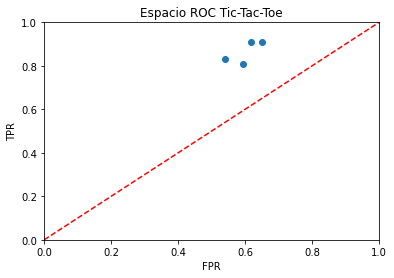

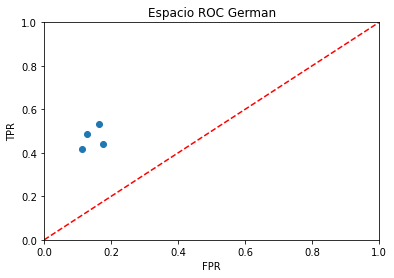

In [16]:
#print(dicc_tasas)
# [TPR, FNR, FPR, TNR]

# Espacio ROC usando los clasificadores NB sobre el dataset de Tic-Tac-Toe.
x = []
x.append(dicc_tasas['Laplace']['VS']['TTT'][2])
x.append(dicc_tasas['Laplace']['VC']['TTT'][2])
x.append(dicc_tasas['NoLaplace']['VS']['TTT'][2])
x.append(dicc_tasas['NoLaplace']['VC']['TTT'][2])

y = []
y.append(dicc_tasas['Laplace']['VS']['TTT'][0])
y.append(dicc_tasas['Laplace']['VC']['TTT'][0])
y.append(dicc_tasas['NoLaplace']['VS']['TTT'][0])
y.append(dicc_tasas['NoLaplace']['VC']['TTT'][0])

title('Espacio ROC Tic-Tac-Toe') 
xlabel('FPR')      
ylabel('TPR')    
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plot(x, y, 'o')                  
show()

# Espacio ROC usando los clasificadores NB sobre el dataset de German.
x = []
x.append(dicc_tasas['Laplace']['VC']['GER'][2])
x.append(dicc_tasas['Laplace']['VS']['GER'][2])
x.append(dicc_tasas['NoLaplace']['VC']['GER'][2])
x.append(dicc_tasas['NoLaplace']['VS']['GER'][2])

y = []
y.append(dicc_tasas['Laplace']['VC']['GER'][0])
y.append(dicc_tasas['Laplace']['VS']['GER'][0])
y.append(dicc_tasas['NoLaplace']['VC']['GER'][0])
y.append(dicc_tasas['NoLaplace']['VS']['GER'][0])

title('Espacio ROC German') 
xlabel('FPR')      
ylabel('TPR')  
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plot(x, y, 'o')                  
show()

- Podemos observar que nuestro clasificador NB funciona correctamente usando ambos datasets, ya que realiza buenas clasificaciones. Esto se refleja en los espacios ROC donde los puntos de las tasas quedan por encima de la bisectriz, como hemos comentado antes. Es decir, la mayor parte de las clasificaciones del clasificador son correctas al haber más verdaderos que falsos.


- Observando los espacios hemos notado que la posición de los puntos indica la cantidad de clasificaciones positivas o negativas del clasificador. Si se encuentran más pegadas al 1 del eje TPR quiere decir que se han clasificado más datos como positivos (como se ve en Tic-Tac-Toe). Y, por el contrario, si se encuentran más cercanos al 0 de TPR (por debajo del 0.5 de TPR), quiere decir que se han clasificado más datos como negativos (como se ve en German).